## Transformation Data and Plotting for kijiji car information

### 1. Transformation

In [55]:
import pandas as pd
import numpy as np

In [101]:
import seaborn as sns

In [56]:
car_df = pd.read_csv('kijiji_car.csv')

In [57]:
car_df.head()

,brand,model,model_year,list_price,color,configration,condition,body_type,wheel_config,transmission,fuel_type,mileage,carfax_link,dealer_address
0,Chevrolet,Silverado 1500,2017,"$30,999.99",Black,LT,Used,Pickup Truck,4 x 4,Automatic,Gasoline,"115,000",https://www.carproof.com/order?ref=kijiji&vin=...,"Brydon Drive, Etobicoke, ON"
1,Volkswagen,Tiguan,2013,"$11,450.00",Grey,COMFORTLINE 4WD,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,"129,000",https://www.carproof.com/order?ref=kijiji&vin=...,"1205 Finch Avenue West, Toronto, ON, M3J 2E8"
2,GMC,Acadia,2017,"$33,988.00",Other,SLT-2,Used,Other,All-wheel drive (AWD),Automatic,Gasoline,"73,893",https://reports.carproof.com/en/main?id=ioaVnM...,"1900 Victoria Park Avenue, Toronto, ON, M1R 1T6"
3,Acura,TL,2002,$500.00,na,na,Used,Sedan,na,na,na,"200,500",https://www.carproof.com/order?ref=kijiji&vin=...,"Toronto, ON M5N1A1"
4,Honda,Accord,2015,"$15,499.00",White,LX,Used,Sedan,Front-wheel drive (FWD),Other,Gasoline,"93,000",https://www.carproof.com/order?ref=kijiji&vin=...,"1726 Kingston Road, Scarborough, ON, M1N 1S8"


In [58]:
car_df['brand'].value_counts()

Mercedes-Benz    403
Volkswagen       374
BMW              335
Honda            325
Nissan           272
Ford             232
Toyota           222
Mazda            202
Chevrolet        185
Hyundai          181
Acura            134
Dodge            126
Audi             121
Jeep             119
Porsche          108
Land Rover        87
GMC               67
Kia               57
Lexus             55
Infiniti          53
Subaru            45
Other             43
Pontiac           39
Mitsubishi        33
Chrysler          31
Cadillac          28
Saturn            26
Maserati          23
Fiat              22
Ram               18
Jaguar             9
Buick              8
Lincoln            7
MINI               5
Tesla              4
Genesis            2
Suzuki             2
na                 1
Isuzu              1
Name: brand, dtype: int64

### Type transformation and dealling the NA data

In [59]:
car_df = car_df.replace('na','0')

In [60]:
# model_year type to int

car_df['model_year'] = pd.to_numeric(car_df['model_year'])

In [120]:
car_df['mileage'] = pd.to_numeric(car_df['mileage'])

In [61]:
# price type to int
i= 0
for item_price in car_df['list_price']:
    if item_price == '0':
        item_price = int(item_price)
            
        car_df.loc[i,'list_price'] = item_price
    else:
        item_price = int(item_price.replace('$','').replace(',','').replace('.',' ').split()[0])
        car_df.loc[i,'list_price'] = item_price
    i+=1

In [62]:
# mileage type to int
i = 0

for odo_mileage in car_df['mileage']:
    if odo_mileage == '0':
         car_df.loc[i,'mileage'] = 0
    else:
        try:
            car_df.loc[i,'mileage'] = int(odo_mileage.replace(',',''))
            
        except:
            pass
    i+=1



### Clean data

In [86]:
car_df.set_index('brand')
car_df.head()

,brand,model,model_year,list_price,color,configration,condition,body_type,wheel_config,transmission,fuel_type,mileage,carfax_link,dealer_address
0,Chevrolet,Silverado 1500,2017,30999,Black,LT,Used,Pickup Truck,4 x 4,Automatic,Gasoline,115000,https://www.carproof.com/order?ref=kijiji&vin=...,"Brydon Drive, Etobicoke, ON"
1,Volkswagen,Tiguan,2013,11450,Grey,COMFORTLINE 4WD,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,129000,https://www.carproof.com/order?ref=kijiji&vin=...,"1205 Finch Avenue West, Toronto, ON, M3J 2E8"
2,GMC,Acadia,2017,33988,Other,SLT-2,Used,Other,All-wheel drive (AWD),Automatic,Gasoline,73893,https://reports.carproof.com/en/main?id=ioaVnM...,"1900 Victoria Park Avenue, Toronto, ON, M1R 1T6"
3,Acura,TL,2002,500,0,0,Used,Sedan,0,0,0,200500,https://www.carproof.com/order?ref=kijiji&vin=...,"Toronto, ON M5N1A1"
4,Honda,Accord,2015,15499,White,LX,Used,Sedan,Front-wheel drive (FWD),Other,Gasoline,93000,https://www.carproof.com/order?ref=kijiji&vin=...,"1726 Kingston Road, Scarborough, ON, M1N 1S8"


### 2. Plotting the data

In [64]:
import matplotlib.pyplot as plt

In [65]:
# Plot

make_count = car_df.groupby('model_year')['brand'].count()

In [66]:
make_count_frame = make_count.to_frame()

In [67]:
make_count_frame.rename(columns={'brand':'total numbers'},inplace=True)
make_count_frame.head()

,total numbers
model_year,
0,1
1969,1
1995,1
1999,4
2000,30


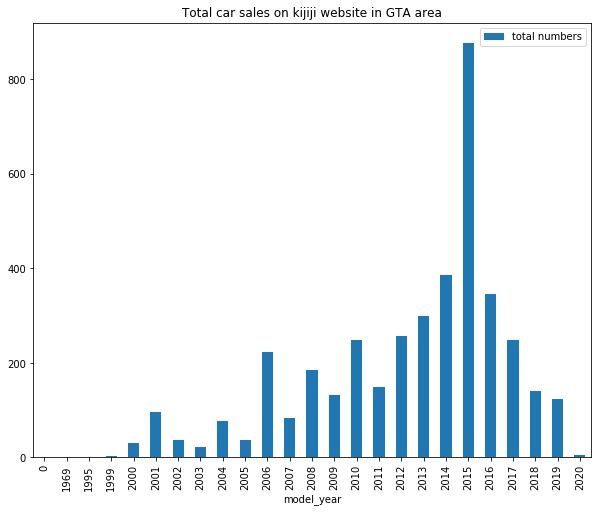

In [68]:
fig = make_count_frame.plot(kind = 'bar',figsize=(10, 8), title = 'Total car sales on kijiji website in GTA area').get_figure()
fig.savefig('kijiji_car_count.png')

In [69]:
brand_count = car_df.groupby('brand')['model_year'].count()

In [70]:
brand_count_df = brand_count.to_frame()

In [71]:
brand_count_df.rename(columns={'model_year':'brand total numbers'},inplace=True)

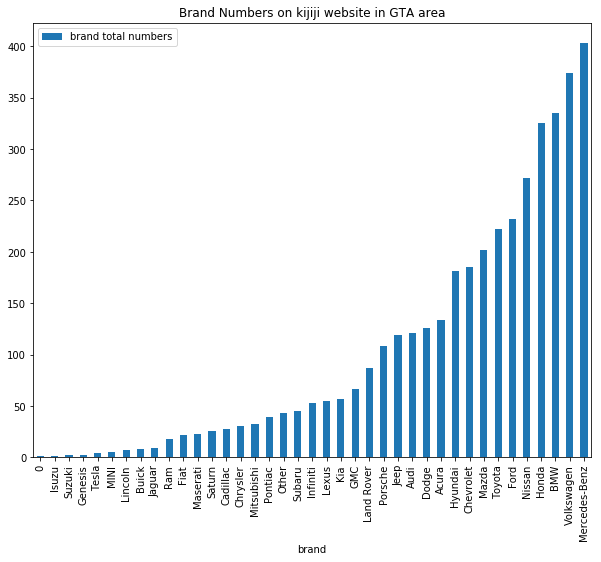

In [73]:

brand_count_df = brand_count_df.sort_values(by=['brand total numbers'])
fig = brand_count_df.plot(kind = 'bar',figsize=(10, 8), title = 'Brand Numbers on kijiji website in GTA area').get_figure()
fig.savefig('kijiji_brand_count.png')

In [121]:
brand_mean = car_df.groupby('brand').mean()

In [122]:
brand_mean.head()

,model_year,list_price,mileage
brand,,,
0,0.000000,0.000000,0.000000
Acura,2010.656716,17111.559701,124198.947761
Audi,2013.933884,29729.958678,95458.675439
BMW,2010.635821,19382.782090,107427.113014
Buick,2011.750000,10639.750000,131067.125000


In [123]:
brand_mean.rename(columns = {'model_year':'mean_model_year','list_price':'mean_list_price','mileage':'mean_mileage'},inplace = True)
brand_mean.head()

,mean_model_year,mean_list_price,mean_mileage
brand,,,
0,0.000000,0.000000,0.000000
Acura,2010.656716,17111.559701,124198.947761
Audi,2013.933884,29729.958678,95458.675439
BMW,2010.635821,19382.782090,107427.113014
Buick,2011.750000,10639.750000,131067.125000


In [124]:
brand_mean_df = brand_mean.reset_index()
brand_mean_df.head()

,brand,mean_model_year,mean_list_price,mean_mileage
0,0,0.000000,0.000000,0.000000
1,Acura,2010.656716,17111.559701,124198.947761
2,Audi,2013.933884,29729.958678,95458.675439
3,BMW,2010.635821,19382.782090,107427.113014
4,Buick,2011.750000,10639.750000,131067.125000


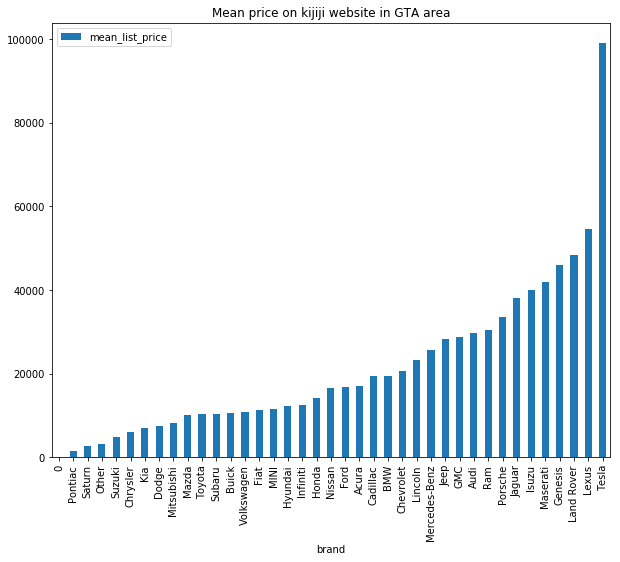

In [128]:
brand_mean_price = brand_mean_df[['brand','mean_list_price']]
brand_mean_price = brand_mean_price.sort_values(by=['mean_list_price'])
brand_mean_price.set_index('brand',inplace=True)
brand_mean_price.plot(kind = 'bar',figsize=(10, 8), title = 'Mean price on kijiji website in GTA area').get_figure()
fig.savefig('kijiji_brand_mean_price.png')

/Users/my_macbook/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


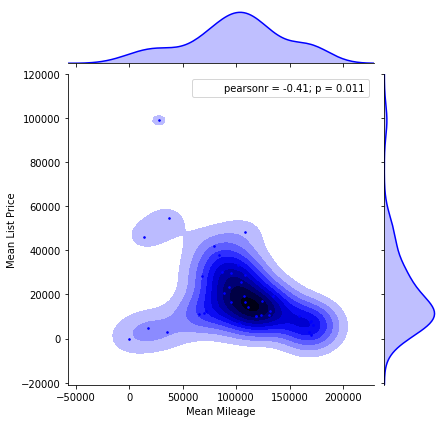

In [131]:

g = sns.jointplot(x="mean_mileage", y="mean_list_price", data=brand_mean, kind="kde", color="b")
g.plot_joint(plt.scatter, c="b", s=10, linewidth=1, marker=".")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Mean Mileage", "Mean List Price");

# Save figure and show it
plt.savefig('Dist_mean_pricemile.png', dpi = 199)
plt.show()

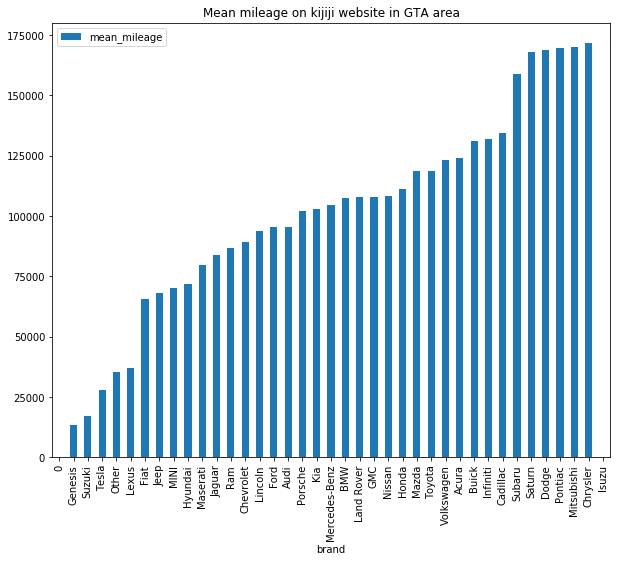

In [129]:
brand_mean_mileage = brand_mean_df[['brand','mean_mileage']]
brand_mean_mileage = brand_mean_mileage.sort_values(['mean_mileage'])
brand_mean_mileage.set_index('brand',inplace=True)
brand_mean_mileage.plot(kind = 'bar',figsize=(10, 8), title = 'Mean mileage on kijiji website in GTA area').get_figure()
fig.savefig('kijiji_brand_mean_mileage.png')

In [150]:
benz_car = car_df.loc[car_df['brand']=='Mercedes-Benz']

In [152]:
benz_car_plot = benz_car[['model_year','list_price','mileage']]
benz_car_plot.dropna()

,model_year,list_price,mileage
53,2008,19000,150000.0
77,2014,23800,57080.0
103,2011,17988,129000.0
152,2009,11995,199461.0
232,2014,23950,116000.0
233,2015,29800,126616.0
336,2015,30999,42327.0
367,2014,28480,97381.0
369,2015,29800,126616.0
381,2015,35999,62000.0


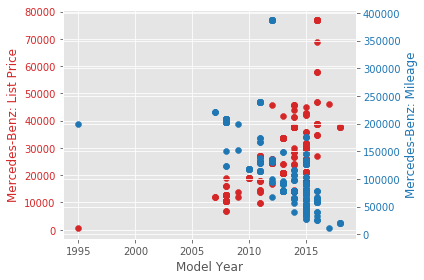

In [161]:
year = benz_car_plot['model_year']
mileage = benz_car_plot['mileage']
price = benz_car_plot['list_price']
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Model Year')
ax1.set_ylabel('Mercedes-Benz: List Price', color=color)
ax1.scatter(year, price, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Mercedes-Benz: Mileage', color=color)  # we already handled the x-label with ax1
ax2.scatter(year, mileage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('kijiji_benz.png')
plt.show()

In [38]:
df= car_df
model_type = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["body_type"].unique()):
        z = df[(df["brand"] == b) & (df["body_type"] == v)]["list_price"].mean()
        model_type = model_type.append(pd.DataFrame({'brand':b , 'body_type':v , 'avgPrice':z}, index=[0]))
model_type = model_type.reset_index()
del model_type["index"]
model_type["avgPrice"].fillna(0,inplace=True)
model_type["avgPrice"].isnull().value_counts()
model_type["avgPrice"] = model_type["avgPrice"].astype(int)
model_type.head(5)

,brand,body_type,avgPrice
0,Chevrolet,Pickup Truck,19790
1,Chevrolet,"SUV, Crossover",32040
2,Chevrolet,Other,12748
3,Chevrolet,Sedan,15778
4,Chevrolet,Coupe (2 door),7786


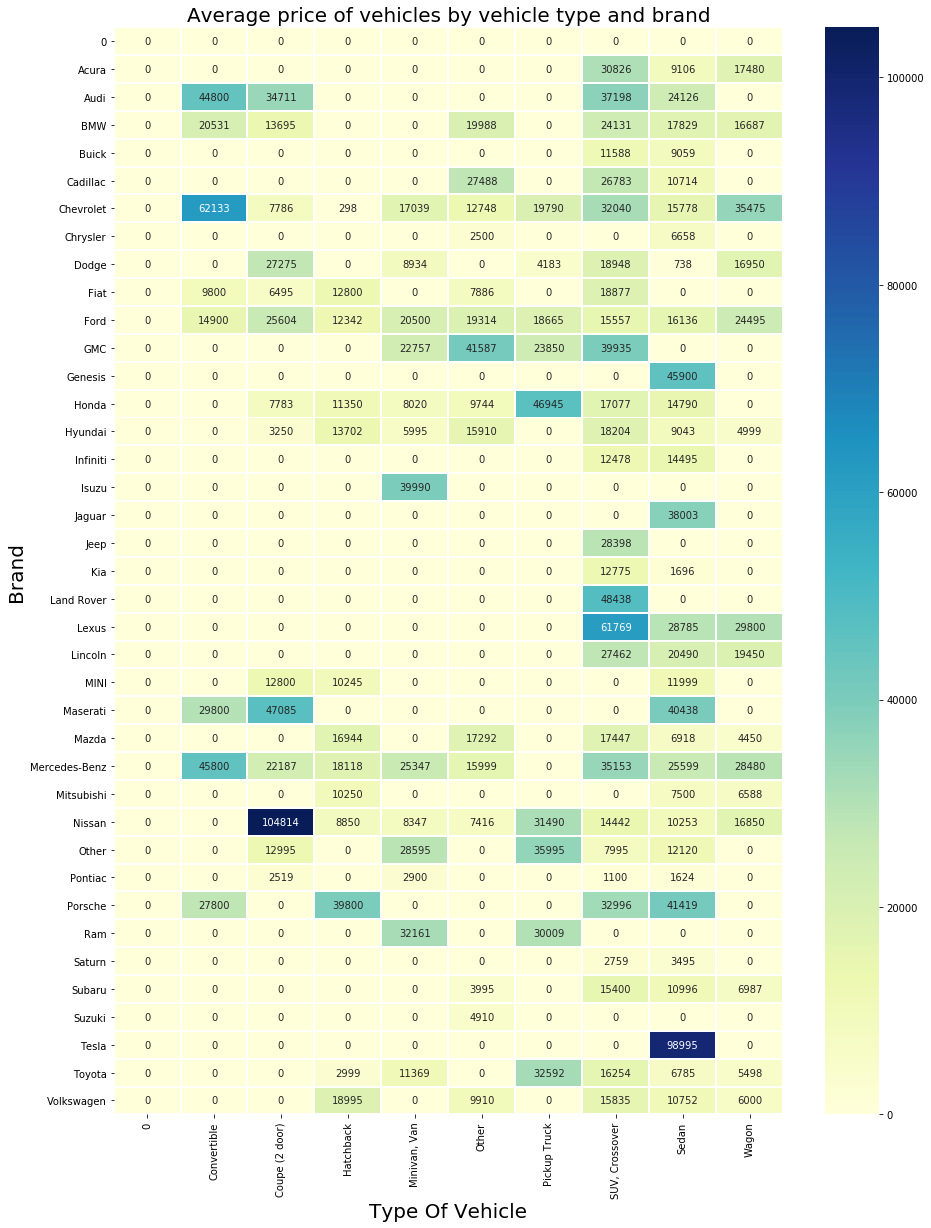

In [44]:

# HeatMap tp show average prices of vehicles by brand and type together
tri = model_type.pivot("brand","body_type", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns_plot = sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d").get_figure()
ax.set_title("Average price of vehicles by vehicle type and brand",fontdict={'size':20})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':20})
ax.yaxis.set_label_text("Brand",fontdict= {'size':20})
sns_plot.savefig('kijiji_type_price.png')
plt.show()


In [46]:
df= car_df
mile_price = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["body_type"].unique()):
        z = df[(df["brand"] == b) & (df["body_type"] == v)]["mileage"].mean()
        mile_price = mile_price.append(pd.DataFrame({'brand':b , 'body_type':v , 'avgMileage':z}, index=[0]))
mile_price = mile_price.reset_index()
del mile_price["index"]
mile_price["avgMileage"].fillna(0,inplace=True)
mile_price["avgMileage"].isnull().value_counts()
mile_price["avgMileage"] = mile_price["avgMileage"].astype(int)
mile_price.head(5)

,brand,body_type,avgMileage
0,Chevrolet,Pickup Truck,156747
1,Chevrolet,"SUV, Crossover",103445
2,Chevrolet,Other,117138
3,Chevrolet,Sedan,67617
4,Chevrolet,Coupe (2 door),135343


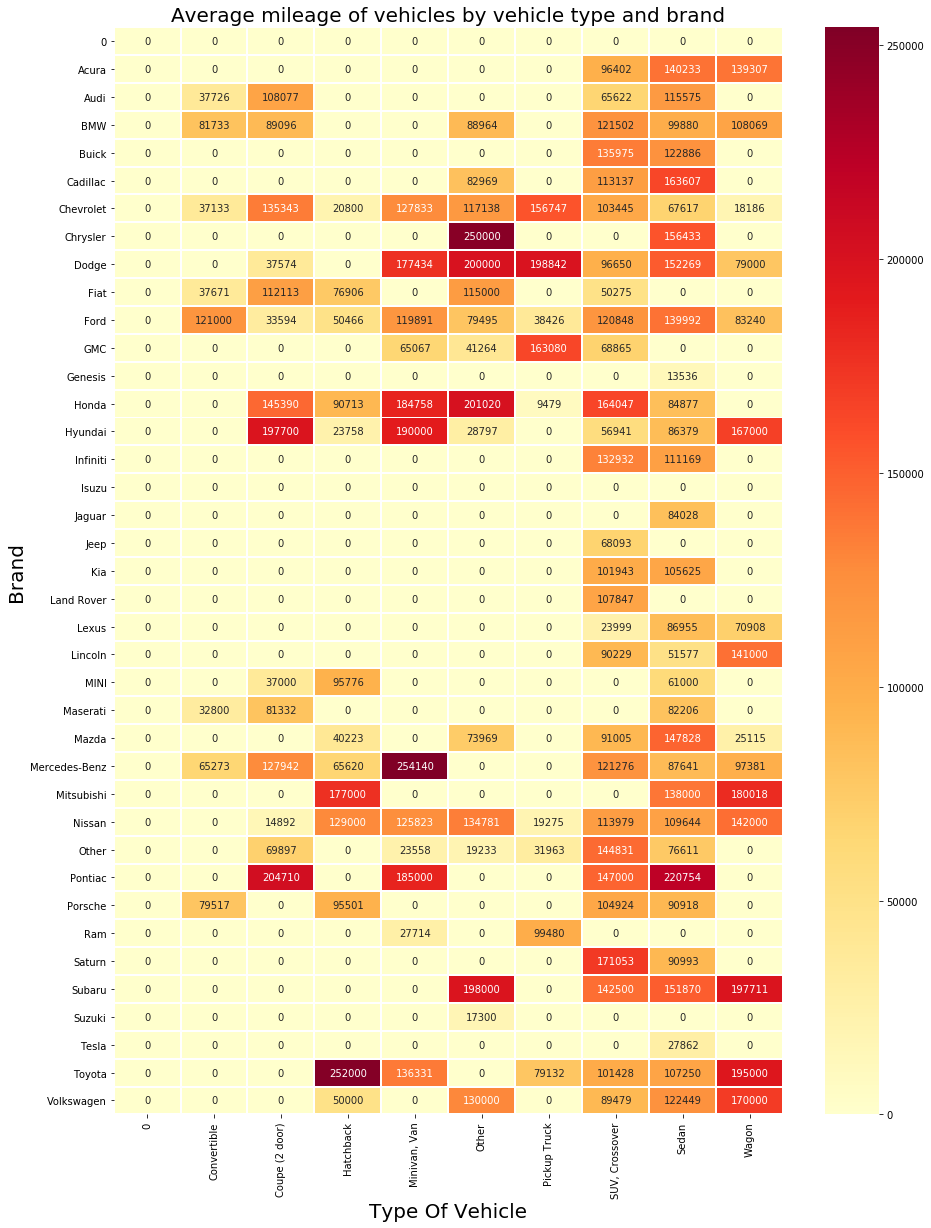

In [49]:
tri = mile_price.pivot("brand","body_type", "avgMileage")
fig, ax = plt.subplots(figsize=(15,20))
sns_plot = sns.heatmap(tri,linewidths=1,cmap="YlOrRd",annot=True, ax=ax, fmt="d").get_figure()
ax.set_title("Average mileage of vehicles by vehicle type and brand",fontdict={'size':20})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':20})
ax.yaxis.set_label_text("Brand",fontdict= {'size':20})
sns_plot.savefig('kijiji_type_mileage.png')
plt.show()